In [20]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
import requests
from Config import weather_api_key

#URL setup
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key


In [26]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)


664

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [31]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Processing Record 15 of Set 14 | grand gaube
Processing Record 16 of Set 14 | qaqortoq
Processing Record 17 of Set 14 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 14 | badiraguato
Processing Record 19 of Set 14 | longyearbyen
Processing Record 20 of Set 14 | dingle
Processing Record 21 of Set 14 | codrington
Processing Record 22 of Set 14 | avera
Processing Record 23 of Set 14 | mendi
Processing Record 24 of Set 14 | georgetown
Processing Record 25 of Set 14 | port hardy
Processing Record 26 of Set 14 | tsihombe
City not found. Skipping...
Processing Record 27 of Set 14 | fairbanks
Processing Record 28 of Set 14 | belushya guba
City not found. Skipping...
Processing Record 29 of Set 14 | sinnamary
Processing Record 30 of Set 14 | cayenne
Processing Record 31 of Set 14 | bluff
Processing Record 32 of Set 14 | clyde river
Processing Record 33 of Set 14 | yanam
Processing Record 34 of Set 14 | duluth
Processing Record 35 of Set 14 | mianyang
Processing Record 36 of 

KeyboardInterrupt: 

In [43]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City" , "Country" , "Date" , "Lat" , "Lng" , "Max Temp" , "Humidity" , "Cloudiness" , "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Grand Gaube,MU,2021-11-23 05:40:16,-20.0064,57.6608,300.58,61,17,2.24
1,Qaqortoq,GL,2021-11-23 05:40:17,60.7167,-46.0333,267.43,79,3,2.61
2,Badiraguato,MX,2021-11-23 05:40:18,25.3667,-107.5167,291.59,57,83,1.48
3,Longyearbyen,SJ,2021-11-23 05:37:06,78.2186,15.6401,257.06,72,20,1.54
4,Dingle,PH,2021-11-23 05:40:18,10.9995,122.6711,302.80,74,76,5.17
5,Codrington,AU,2021-11-23 05:40:19,-38.2667,141.9667,290.02,97,100,4.79
6,Avera,US,2021-11-23 05:40:19,33.1940,-82.5271,281.88,37,22,4.50
7,Mendi,PG,2021-11-23 05:40:20,-6.1761,143.6513,290.12,95,84,1.25
8,Georgetown,MY,2021-11-23 05:40:20,5.4112,100.3354,305.12,66,40,3.09
9,Port Hardy,CA,2021-11-23 05:40:20,50.6996,-127.4199,280.15,100,90,1.54


In [47]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [49]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


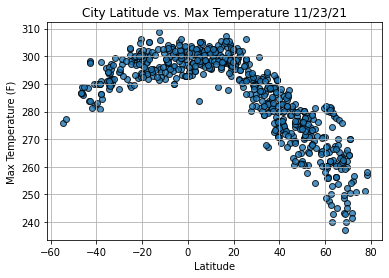

In [53]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

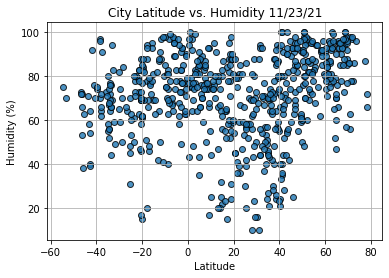

In [54]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


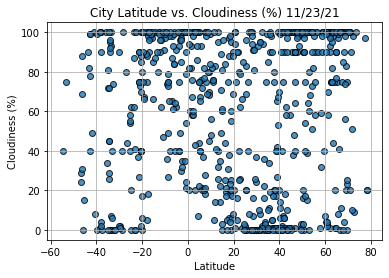

In [55]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()